# Track Analysis Dashboard

TV commentators will describe tracks with terms such as High-downforce and Power tracks these aren’t official terms but they help describe the different characteristics of circuits and explain why teams don’t simply qualify in the same order every week.

### High-downforce tracks
Hungary, Imola, Singapore, Spain and Monaco are all examples of high downforce tracks, with relatively short straights and lots of turns putting a greater emphasis on cornering speed. In particular, Sector 3 in Barcelona - which features a series of low-speed turns - is historically a good gauge for how cars will perform in Monaco, which normally follows Spain on the F1 calendar.

Tracks like Silverstone and Spa feature high downforce sequences that can see the drivers pulling up to 6G in some cases. However the long straights and high-speed corners on these sectors mean that power still has a big influence on car ranking.

### Power tracks
The Italian Grand Prix at Monza is a classic power track in F1. Drivers are believed to spend 75% of the lap at full throttle around Monza. Other power tracks with long straights include Russia, Mexico, Canada, Baku and Austria, among others.

## Problem:
Below is a sample of data from the FastF1 api, it pulls in qualifiation data from the 2023 Canadian GP. Using this data and data from the 2022 season, create a dashbaord to analyse which tracks are better suited to Williams cars, highlighting characteristics which influence this.

For simplicity of the data we will use the FastF1 api (https://docs.fastf1.dev/index.html) and have provided sample code to extract Qualification data for the Candian GP 2023.

In [1]:
import fastf1 as ff1
import fastf1.plotting
from matplotlib import pyplot as plt
import os
import pandas as pd

In [2]:
# Directory for the cache
cache_dir = 'cache_folder'

# Create the directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

ff1.Cache.enable_cache('cache_folder')

In [3]:
# Collect Qualification data from Canada 2023
session = ff1.get_session(2023, "Canada", 'Q')
session.load(telemetry=True)
laps = session.laps
car_data = session.car_data
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]

core           INFO 	Loading data for Canadian Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '27', '14', '44', '63', '31', '4', '55', '81', '23', '16', '11', '18', '20', '77', '22', '10', '21', '2', '24']


In [4]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

In [5]:
# Pick Albons fastest lap
best_alb = session.laps.pick_driver('ALB').pick_fastest()
best_alb_start = best_alb['LapStartTime']
best_alb_end = best_alb['LapStartTime'] +  best_alb['LapTime']

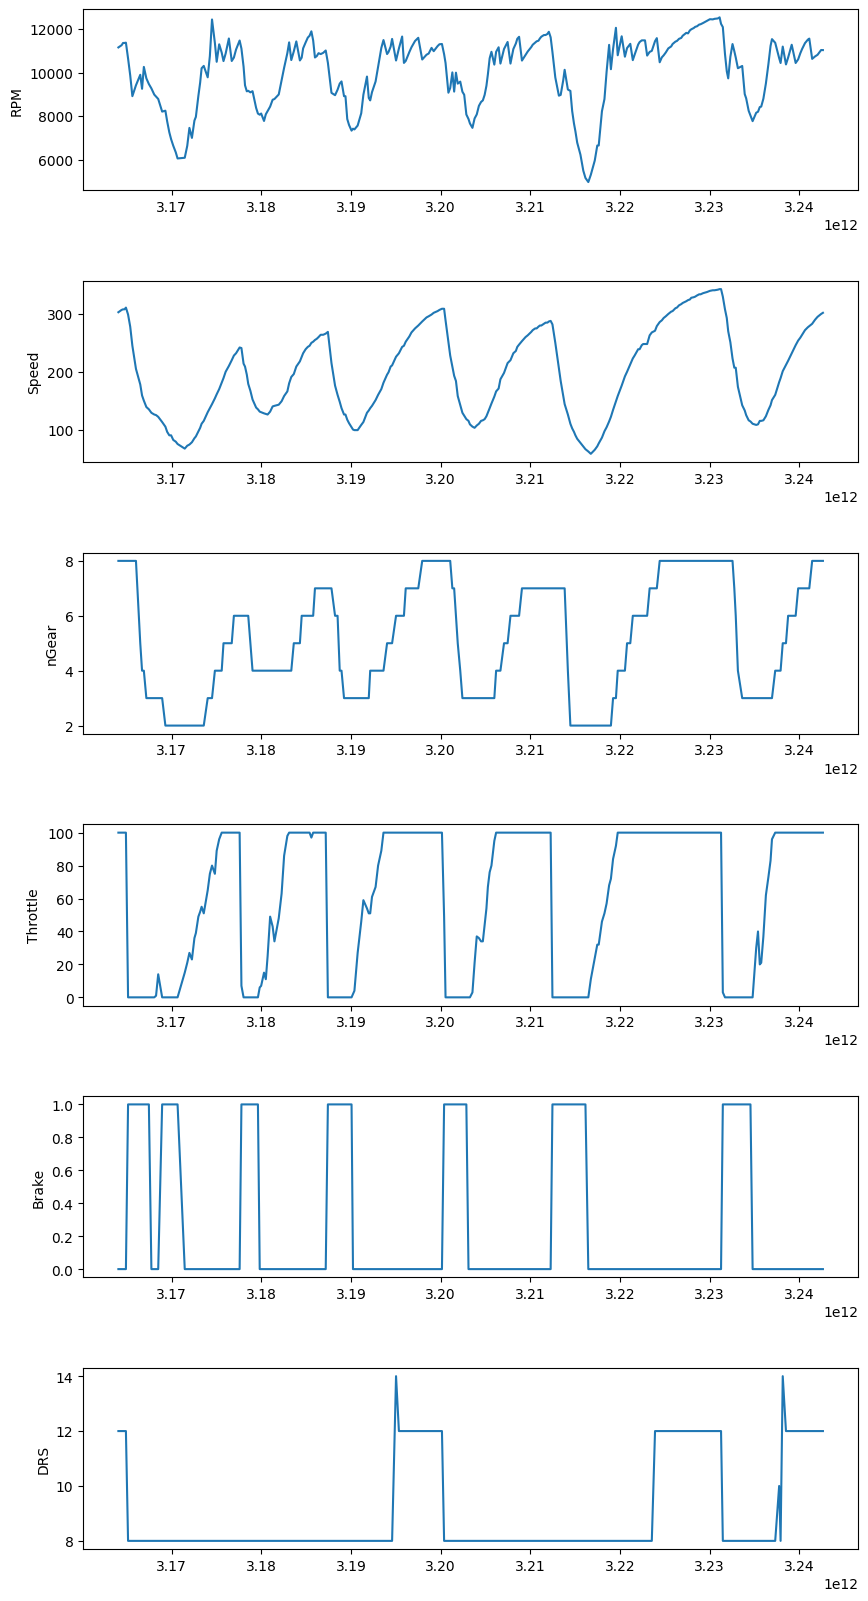

In [6]:
alb = car_data['23']

filtered_alb = alb[(alb['Time'] >= best_alb_start) & (alb['Time'] <= best_alb_end)]

# Create subplots for each variable
fig, axs = plt.subplots(6, 1, figsize=(10, 20))

# Plot each variable against time
axs[0].plot(filtered_alb['Time'], filtered_alb['RPM'])
axs[0].set_ylabel('RPM')

axs[1].plot(filtered_alb['Time'], filtered_alb['Speed'])
axs[1].set_ylabel('Speed')

axs[2].plot(filtered_alb['Time'], filtered_alb['nGear'])
axs[2].set_ylabel('nGear')

axs[3].plot(filtered_alb['Time'], filtered_alb['Throttle'])
axs[3].set_ylabel('Throttle')

axs[4].plot(filtered_alb['Time'], filtered_alb['Brake'])
axs[4].set_ylabel('Brake')

axs[5].plot(filtered_alb['Time'], filtered_alb['DRS'])
axs[5].set_ylabel('DRS')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()

In [7]:
alb

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-06-17 19:45:01.978,417,0,0,104,True,8,car,0 days 00:00:01.290000,0 days 00:00:01.290000
1,2023-06-17 19:45:02.258,417,0,0,104,True,8,car,0 days 00:00:01.570000,0 days 00:00:01.570000
2,2023-06-17 19:45:02.458,417,0,0,104,True,8,car,0 days 00:00:01.770000,0 days 00:00:01.770000
3,2023-06-17 19:45:02.818,417,0,0,104,True,8,car,0 days 00:00:02.130000,0 days 00:00:02.130000
4,2023-06-17 19:45:03.058,417,0,0,104,True,8,car,0 days 00:00:02.370000,0 days 00:00:02.370000
...,...,...,...,...,...,...,...,...,...,...
20316,2023-06-17 21:14:41.396,0,0,0,104,True,9,car,0 days 01:29:40.708000,0 days 01:29:40.708000
20317,2023-06-17 21:14:41.676,0,0,0,104,True,9,car,0 days 01:29:40.988000,0 days 01:29:40.988000
20318,2023-06-17 21:14:41.916,0,0,0,104,True,9,car,0 days 01:29:41.228000,0 days 01:29:41.228000
20319,2023-06-17 21:14:42.315,0,0,0,104,True,9,car,0 days 01:29:41.627000,0 days 01:29:41.627000
